In [18]:
%load_ext autoreload
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.debugger import Pdb
from sklearn.metrics import roc_curve, f1_score

import experiment.top_30_class as experiment
from evaluator import Evaluator
from label_handler import LabelHandler
from video_handler import VideoViewer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


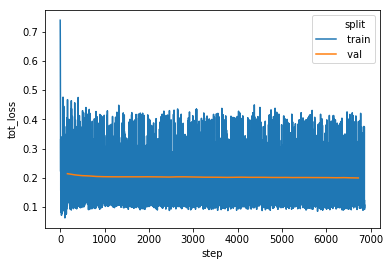

In [2]:
learning_stat = pd.read_csv("../experiment/top_30_class/train_log.csv")
sns.lineplot(x="step", y="tot_loss", hue="split", data=learning_stat)

In [3]:
ave = learning_stat["tot_loss"].rolling(window=10,min_periods=1).mean()
train_loss = ave.values

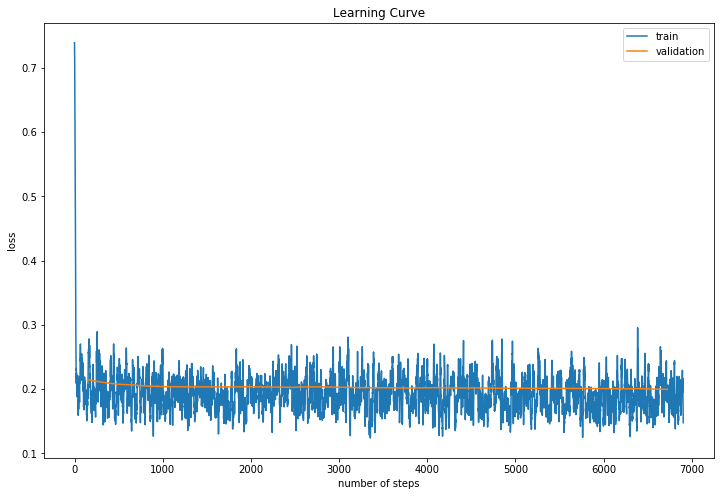

In [15]:
train_loss = learning_stat[learning_stat["split"] == " train"]
val_loss = learning_stat[learning_stat["split"] == " val"]
train_loss_MA = learning_stat["tot_loss"].rolling(window=10,min_periods=1).mean()
train_loss_y = train_loss_MA.values
val_loss_x = val_loss["step"]
val_loss_y = val_loss["tot_loss"]
plt.figure(figsize=(12,8))
plt.plot(train_loss_y, label="train")
plt.plot(val_loss_x, val_loss_y, label="validation")
plt.xlabel("number of steps")
plt.ylabel("loss")
plt.legend()
plt.title("Learning Curve")
plt.savefig("../experiment/top_30_class/figures/learning_step.pdf")

In [63]:
evaluator = Evaluator()
label_handler = LabelHandler("experiment/top_30_class/index.csv")
label_handler.expand_index()
print("number of total labels {}".format(len(label_handler.expanded_df)))
evaluator.load_result("../experiment/top_30_class/result_with_video.pkl")
evaluator.stats_setup()

number of total labels 1175


棒グラフの出力
[("man", 0.444444, 0.222222), ("woman", 0.774444, 0.322222)]
を作って
plt.bar
plt.bar
plt.xtick
みたいな感じでつくる

In [8]:
evaluator.accuracy()

array([ 0.97508897,  0.97864769,  0.93594306,  0.95017794,  0.96085409,
        0.95373665,  0.9252669 ,  0.93238434,  0.87188612,  1.        ,
        0.96085409,  0.7544484 ,  0.97864769,  0.97864769,  0.97864769,
        0.96797153,  0.97508897,  0.88967972,  0.80782918,  0.98932384])

In [60]:
acc = evaluator.accuracy()
auc = evaluator.auc()
label_count = label_handler.label_count()
print("number of videos used to train: {}".format(len(experiment.dataset)))
print("number of videos used for validation: {}".format(len(experiment.val_dataset)))
print("number of labels {}".format(label_count))

number of videos used to train: 657
number of videos used for validation: 281
number of labels {'baby': 29, 'boat': 14, 'boy': 43, 'car': 36, 'crowd': 43, 'dog': 40, 'girl': 57, 'grass': 49, 'hand': 124, 'keyboard': 13, 'machine': 44, 'man': 261, 'road': 24, 'sky': 23, 'smoke': 16, 'snow': 20, 'tree': 25, 'water': 102, 'woman': 194, 'wood': 18}


In [7]:
score_matrix = evaluator.score_matrix
true_label_matrix = evaluator.label_matrix

In [8]:
# calculate true positive rate when false positive rate = threshold
tpr_list = []
thres = 0.3
for i in range(score_matrix.shape[1]):
    true_label = true_label_matrix[:, i]
    score = score_matrix[:, i]
    fpr,tpr, threshold = roc_curve(true_label, score)
    for i in range(len(fpr)):
        if (fpr[i] <= thres and fpr[i + 1] >= thres):
            tpr_list.append(tpr[i])

In [54]:
# calculate F1 score
f1_list = []
thres = 0.05
predicted = evaluator.score_matrix >= thres
for i in range(score_matrix.shape[1]):
    true_label = true_label_matrix[:, i]
    predict_label = predicted[:, i]
    f1 = f1_score(true_label,predict_label)
    f1_list.append(f1)

In [55]:
bar_plot_data = zip(experiment.mlb.classes_, tpr_list, f1_list, auc)
bar_plot_data = sorted(
    bar_plot_data, key=lambda k: label_count[k[0]], reverse=True)

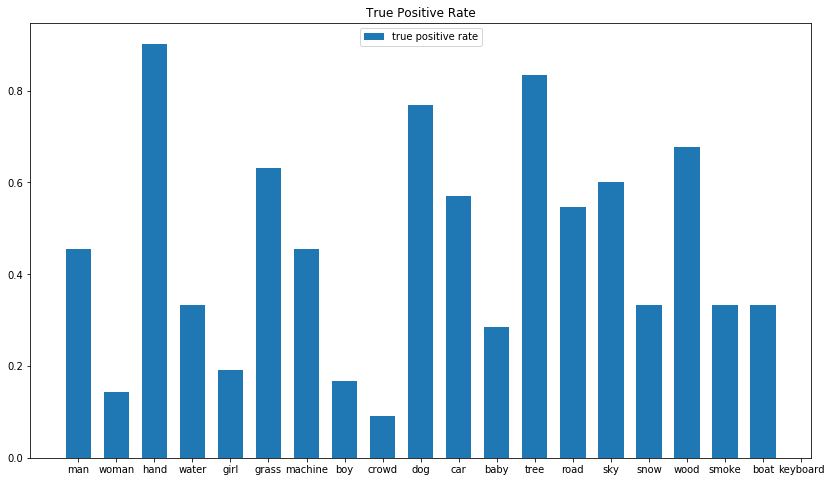

In [56]:
x = np.arange(len(bar_plot_data)) * 1.2
labels = list(map(lambda d:d[0], bar_plot_data))
tpr = np.array(list(map(lambda d:d[1], bar_plot_data))).astype(np.float)
auc = np.array(list(map(lambda d:d[3], bar_plot_data))).astype(np.float)
f1_scores = np.array(list(map(lambda d:d[2], bar_plot_data))).astype(np.float)
plt.figure(figsize=(14,8))
plt.bar(x, tpr, label="true positive rate")
plt.xticks(x,labels)
plt.legend()
plt.title("True Positive Rate")
plt.savefig("../experiment/top_30_class/figures/true_positive_rate.pdf")

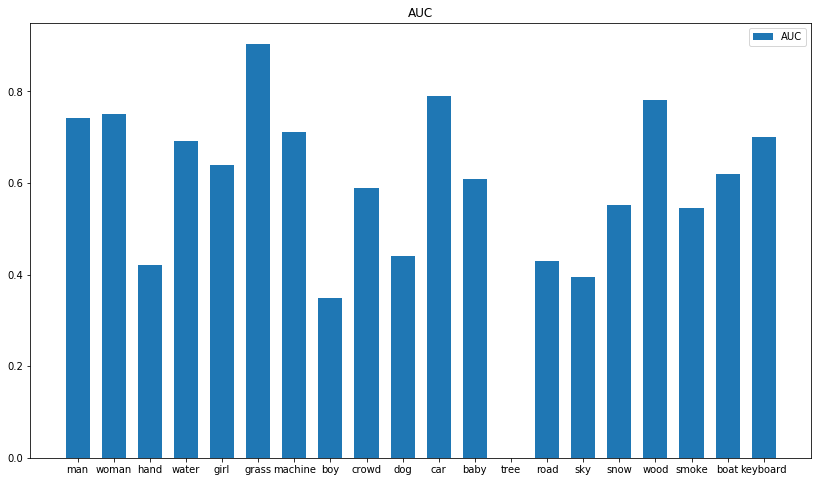

In [57]:
plt.figure(figsize=(14,8))
plt.bar(x, auc, label="AUC")
plt.xticks(x,labels)
plt.title("AUC")
plt.legend()
plt.savefig("../experiment/top_30_class/figures/AUC.pdf")

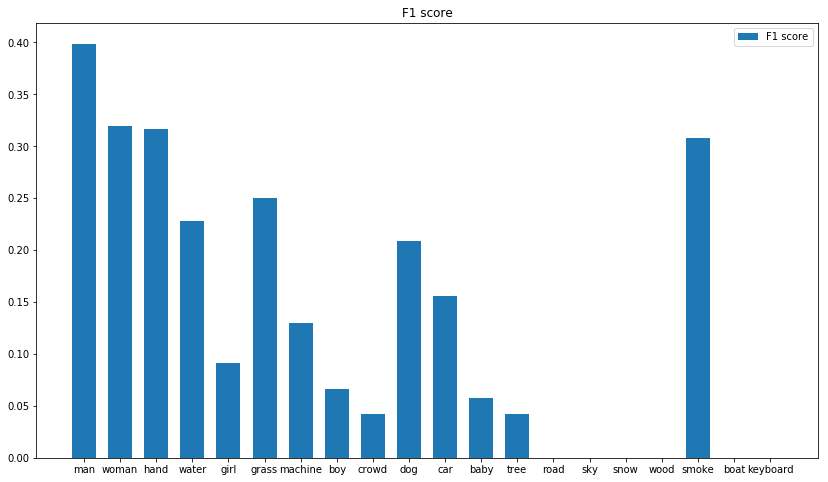

In [58]:
plt.figure(figsize=(14,8))
plt.bar(x, f1_scores, label="F1 score")
plt.xticks(x,labels)
plt.title("F1 score")
plt.legend()
plt.savefig("../experiment/top_30_class/figures/F1_score.pdf")

In [12]:
bar_plot_data

[('man', 0.45454545454545453, 0.74218009478673008),
 ('woman', 0.14285714285714285, 0.74966898378020519),
 ('hand', 0.90243902439024393, 0.90436991869918693),
 ('water', 0.33333333333333331, 0.71045161290322578),
 ('girl', 0.19047619047619047, 0.4206959706959707),
 ('grass', 0.63157894736842102, 0.7002812374447569),
 ('machine', 0.45454545454545453, 0.58956228956228951),
 ('boy', 0.16666666666666666, 0.44000844951415297),
 ('crowd', 0.090909090909090912, 0.34848484848484851),
 ('dog', 0.76923076923076927, 0.78071182548794482),
 ('car', 0.5714285714285714, 0.63937934724451584),
 ('baby', 0.2857142857142857, 0.6084462982273201),
 ('tree', 0.83333333333333337, 0.39572471324296143),
 ('road', 0.54545454545454541, 0.54606060606060614),
 ('sky', 0.59999999999999998, 0.69272727272727275),
 ('snow', 0.33333333333333331, 0.55269607843137258),
 ('wood', 0.67741935483870963, 0.4304556354916067),
 ('smoke', 0.33333333333333331, 0.79090909090909089),
 ('boat', 0.33333333333333331, 0.618787878787878

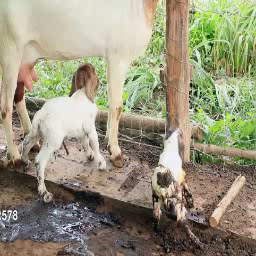

In [169]:
sample_idx = 14
sample_path = evaluator.result[sample_idx]["video"]
VideoViewer(sample_path).image_as_PIL(0)

In [168]:
prediction = zip(experiment.mlb.classes_, score_matrix[sample_idx])
position = sorted(prediction, key=lambda key: key[1], reverse=True)
list(position)

[('man', 0.25146282),
 ('woman', 0.19722825),
 ('hand', 0.1366104),
 ('water', 0.067417987),
 ('girl', 0.062094484),
 ('crowd', 0.058845937),
 ('boy', 0.057115294),
 ('car', 0.051159088),
 ('machine', 0.049825795),
 ('grass', 0.042186726),
 ('dog', 0.041610219),
 ('baby', 0.037213393),
 ('tree', 0.032972224),
 ('road', 0.030570308),
 ('keyboard', 0.027566358),
 ('wood', 0.026953856),
 ('sky', 0.025351834),
 ('smoke', 0.018337123),
 ('snow', 0.018227939),
 ('boat', 0.01518199)]

In [ ]:
fpr,tpr, threshold = roc_curve(true_label_matrix[:,11], score_matrix[:, 11])
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1), np.linspace(0,1))
ax = plt.gca()
ax.set_aspect("equal", "box")

In [186]:
score_df = pd.DataFrame(score_matrix)
score_df.columns = experiment.mlb.classes_
score_df["video"] = list(map(lambda result: result["video"], evaluator.result))

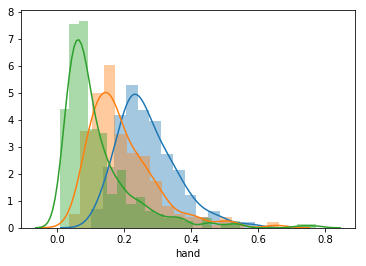

In [181]:
score_df
sns.distplot(score_df["man"])
sns.distplot(score_df["woman"])
sns.distplot(score_df["hand"])

In [194]:
sorted_man = score_df.sort_values("man", ascending=False)


In [208]:
man_high = sorted_man.iloc[400]["video"]
VideoViewer(man_high).image_as_PIL(0)

IndexError: single positional indexer is out-of-bounds

In [193]:
sorted_man

,baby,boat,boy,car,crowd,dog,girl,grass,hand,keyboard,...,man,road,sky,smoke,snow,tree,water,woman,wood,video
268,0.017956,0.005749,0.029437,0.017789,0.025502,0.025788,0.028004,0.015356,0.531479,0.012731,...,0.100262,0.014365,0.015814,0.007193,0.007210,0.017221,0.080637,0.075840,0.013255,data/MIT_data/training/working/v048_0050.mp4
65,0.012076,0.004143,0.019133,0.009185,0.028706,0.026519,0.026504,0.028787,0.092348,0.008470,...,0.104447,0.010874,0.013665,0.004482,0.005864,0.011422,0.196141,0.108084,0.008186,data/MIT_data/training/overflowing/v228_0018.mp4
52,0.028420,0.009378,0.024008,0.033223,0.041460,0.025454,0.030077,0.049269,0.035169,0.009246,...,0.110017,0.017716,0.012537,0.008838,0.009011,0.020298,0.204993,0.076802,0.009793,data/MIT_data/training/smashing/v111_0056.mp4
207,0.005208,0.001530,0.006382,0.006260,0.015693,0.010389,0.008365,0.009137,0.039774,0.002689,...,0.125709,0.006589,0.005037,0.002480,0.001996,0.005769,0.022315,0.034099,0.003762,data/MIT_data/training/marching/v065_0087.mp4
181,0.021593,0.008228,0.024461,0.030780,0.040850,0.027908,0.044802,0.024125,0.050013,0.010924,...,0.130077,0.014136,0.011434,0.008229,0.008707,0.023860,0.077047,0.090325,0.011997,data/MIT_data/training/ascending/v328_0040.mp4
93,0.009880,0.003103,0.009192,0.011665,0.019560,0.012712,0.016228,0.009575,0.180657,0.005407,...,0.131727,0.008281,0.008622,0.002897,0.003435,0.009602,0.058418,0.099019,0.007271,data/MIT_data/training/painting/v233_0091.mp4
188,0.009826,0.004187,0.016027,0.011750,0.018588,0.017588,0.019426,0.015933,0.725993,0.011246,...,0.131928,0.013362,0.012209,0.005526,0.005085,0.011832,0.055907,0.062346,0.009511,data/MIT_data/training/sewing/v046_0093.mp4
273,0.032345,0.014559,0.033221,0.036353,0.071875,0.046494,0.050149,0.037451,0.254443,0.019704,...,0.137526,0.033659,0.022808,0.015939,0.014451,0.030726,0.115272,0.096285,0.022989,data/MIT_data/training/shredding/v183_0079.mp4
155,0.017604,0.007761,0.021277,0.027057,0.044386,0.030540,0.045241,0.028728,0.123980,0.011895,...,0.137815,0.023302,0.014898,0.011014,0.008749,0.024734,0.107655,0.090944,0.013769,data/MIT_data/training/fueling/v266_0078.mp4
45,0.016202,0.006890,0.017668,0.019867,0.032239,0.022672,0.029148,0.032130,0.131947,0.011654,...,0.139492,0.022028,0.014946,0.008017,0.006253,0.017042,0.104759,0.085868,0.013526,data/MIT_data/training/skating/v232_0018.mp4
